# Tensorflow 2.0 Kullanarak CIFAR10 Veri Setinde CNN ile Sınıflandırma Yapma

In [2]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 69kB/s 
     |████████████████████████████████| 3.0MB 20.8MB/s 
     |████████████████████████████████| 419kB 41.4MB/s 


Gerekli kütüphaneler ve veri setinin indirilmesi

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.0.0-alpha0'

10 farklı sınıfa ait veriler bulunmaktadır

In [0]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Verinin train ve test olarak alınması

In [3]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


Örnek bir resim

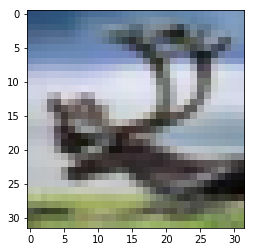

In [53]:
plt.imshow(X_test[40])

Verinin normalize edilmesi

In [0]:
X_train = X_train / 255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test=X_test/255.0

In [39]:
X_test.shape

(10000, 32, 32, 3)

# Model 1

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [10]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 23s 467us/sample - loss: 1.3841 - sparse_categorical_accuracy: 0.5010
Epoch 2/5
50000/50000 [==============================] - 19s 381us/sample - loss: 0.9345 - sparse_categorical_accuracy: 0.6705
Epoch 3/5
50000/50000 [==============================] - 19s 376us/sample - loss: 0.7538 - sparse_categorical_accuracy: 0.7359
Epoch 4/5
50000/50000 [==============================] - 18s 370us/sample - loss: 0.6213 - sparse_categorical_accuracy: 0.7811
Epoch 5/5
50000/50000 [==============================] - 19s 374us/sample - loss: 0.5196 - sparse_categorical_accuracy: 0.8153


In [40]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 169us/sample - loss: 0.7704


In [54]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.46959999203681946


# Model 2

In [0]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(units=128, activation='relu'))
model2.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [15]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [0]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [18]:
model2.fit(X_train, y_train, epochs=15)

Epoch 1/15
50000/50000 [==============================] - 19s 381us/sample - loss: 1.3574 - sparse_categorical_accuracy: 0.5097
Epoch 2/15
50000/50000 [==============================] - 18s 368us/sample - loss: 0.8953 - sparse_categorical_accuracy: 0.6852
Epoch 3/15
50000/50000 [==============================] - 18s 366us/sample - loss: 0.7284 - sparse_categorical_accuracy: 0.7450
Epoch 4/15
50000/50000 [==============================] - 18s 366us/sample - loss: 0.6159 - sparse_categorical_accuracy: 0.7834
Epoch 5/15
50000/50000 [==============================] - 18s 369us/sample - loss: 0.5127 - sparse_categorical_accuracy: 0.8212
Epoch 6/15
50000/50000 [==============================] - 18s 369us/sample - loss: 0.4234 - sparse_categorical_accuracy: 0.8499
Epoch 7/15
50000/50000 [==============================] - 18s 366us/sample - loss: 0.3435 - sparse_categorical_accuracy: 0.8794
Epoch 8/15
50000/50000 [==============================] - 18s 367us/sample - loss: 0.2731 - sparse_categ

In [42]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 165us/sample - loss: 1.5470 - sparse_categorical_accuracy: 0.7246


In [43]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7246000170707703


# Model 3

In [21]:
IMG_SHAPE = (32, 32, 3)
# Pre-trained model with MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)
# Freeze the pre-trained model weights
base_model.trainable = False
# Trainable classification head
maxpool_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer = tf.keras.layers.Dense(units=10, activation='softmax')
# Layer classification head with feature detector
model3 = tf.keras.Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])

model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


In [22]:
model3.fit(X_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 31s 623us/sample - loss: 2.2256 - sparse_categorical_accuracy: 0.2851
Epoch 2/10
50000/50000 [==============================] - 28s 565us/sample - loss: 2.0421 - sparse_categorical_accuracy: 0.3326
Epoch 3/10
50000/50000 [==============================] - 28s 565us/sample - loss: 2.0336 - sparse_categorical_accuracy: 0.3327
Epoch 4/10
50000/50000 [==============================] - 28s 566us/sample - loss: 2.0230 - sparse_categorical_accuracy: 0.3363
Epoch 5/10
50000/50000 [==============================] - 28s 565us/sample - loss: 2.0291 - sparse_categorical_accuracy: 0.3365
Epoch 6/10
50000/50000 [==============================] - 28s 560us/sample - loss: 2.0280 - sparse_categorical_accuracy: 0.3357
Epoch 7/10
50000/50000 [==============================] - 28s 566us/sample - loss: 2.0300 - sparse_categorical_accuracy: 0.3329
Epoch 8/10
50000/50000 [==============================] - 28s 566us/sample - loss: 2.0277 - sparse_categ

In [44]:
test_loss, test_accuracy = model3.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 384us/sample - loss: 1.9838 - sparse_categorical_accuracy: 0.3488


In [45]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.34880000352859497


# Model 3.2

In [32]:
IMG_SHAPE = (32, 32, 3)
# Pre-trained model with MobileNetV2
base_model2 = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)
# Freeze the pre-trained model weights
base_model2.trainable = True

for layer in base_model2.layers[:100]:
  layer.trainable =  False
  
  
  
# Trainable classification head
maxpool_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer = tf.keras.layers.Dense(units=10, activation='softmax')
# Layer classification head with feature detector
model32 = tf.keras.Sequential([
    base_model2,
    maxpool_layer,
    prediction_layer
])
num_epochs = 10
fine_tune_epochs = 30
total_epochs =  num_epochs + fine_tune_epochs

model32.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [33]:
model32.fit(X_train, y_train, epochs=total_epochs)

Epoch 1/40
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.6266 - sparse_categorical_accuracy: 0.4752
Epoch 2/40
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.3657 - sparse_categorical_accuracy: 0.5586
Epoch 3/40
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.2708 - sparse_categorical_accuracy: 0.5945
Epoch 4/40
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.2294 - sparse_categorical_accuracy: 0.6071
Epoch 5/40
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.1498 - sparse_categorical_accuracy: 0.6277
Epoch 6/40
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.1687 - sparse_categorical_accuracy: 0.6236
Epoch 7/40
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.1298 - sparse_categorical_accuracy: 0.6391
Epoch 8/40
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.1043 - sparse_categorical_accuracy:

In [46]:
test_loss, test_accuracy = model32.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 396us/sample - loss: 0.8604 - sparse_categorical_accuracy: 0.7071


In [47]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.707099974155426


# Model 4

In [25]:
IMG_SHAPE = (32, 32, 3)
res_net = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [0]:
res_net.trainable = False

In [0]:
from tensorflow.keras import layers
global_average_layer = layers.GlobalAveragePooling2D()
output_layer = layers.Dense(units=10, activation='softmax')
tl_model = tf.keras.Sequential([
  res_net,
  global_average_layer,
  output_layer
])

In [29]:
tl_model.summary() 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
tl_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [31]:
tl_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.8940 - sparse_categorical_accuracy: 0.4085
Epoch 2/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.7111 - sparse_categorical_accuracy: 0.4568
Epoch 3/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.6878 - sparse_categorical_accuracy: 0.4608
Epoch 4/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.6797 - sparse_categorical_accuracy: 0.4656
Epoch 5/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.6888 - sparse_categorical_accuracy: 0.4672
Epoch 6/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.6740 - sparse_categorical_accuracy: 0.4695
Epoch 7/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.6874 - sparse_categorical_accuracy: 0.4682
Epoch 8/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.6871 - sparse_categorical_accuracy:

In [48]:
test_loss, test_accuracy = tl_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 9s 914us/sample - loss: 1.8397 - sparse_categorical_accuracy: 0.4696


In [49]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.46959999203681946
